In [13]:
import numpy
print(numpy.__version__)

1.14.6


In [14]:
import scipy
print(scipy.__version__)

1.1.0


In [15]:
import keras
print(keras.__version__)

2.2.4


In [16]:
# !pip install configobj
import configobj
print(configobj.__version__)

5.0.6


In [17]:
import cv2
print(cv2.__version__)

3.4.3


In [18]:
import PIL
print(PIL.__version__)

4.0.0


In [25]:
import matplotlib
print(matplotlib.__version__)

3.0.2


In [19]:
import IPython
print(IPython.__version__)

5.5.0


In [2]:
!git clone https://github.com/21-projects-for-deep-learning/keras_Realtime_Multi-Person_Pose_Estimation.git

Cloning into 'keras_Realtime_Multi-Person_Pose_Estimation'...
remote: Enumerating objects: 184, done.
remote: Total 184 (delta 0), reused 0 (delta 0), pack-reused 184
Receiving objects: 100% (184/184), 29.49 MiB | 37.93 MiB/s, done.
Resolving deltas: 100% (75/75), done.


In [4]:
import os
os.chdir("keras_Realtime_Multi-Person_Pose_Estimation")

!ls

caffe_to_keras.py  demo_camera.py  dump_caffe_layers.py  README.md	videos
config		   demo_image.py   LICENSE		 sample_images
config_reader.py   demo.ipynb	   model		 training
dataset		   demo_video.py   readme		 util.py


In [5]:
!sh model/get_keras_model.sh

--2019-01-26 12:12:27--  https://www.dropbox.com/s/llpxd14is7gyj0z/model.h5
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/llpxd14is7gyj0z/model.h5 [following]
--2019-01-26 12:12:28--  https://www.dropbox.com/s/raw/llpxd14is7gyj0z/model.h5
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7cd7e1c1ae78c938b13702097d.dl.dropboxusercontent.com/cd/0/inline/AaIPNpVBVsz58VVNtb3RkM1tg4zSBuvGGKjEtH7O1y93d9Nw7bgpHPXKYRhfgYvigW5l6JCqtIjjMaIxENI80wwv5YDj38iOIotqHhIceg6Izg/file# [following]
--2019-01-26 12:12:28--  https://uc7cd7e1c1ae78c938b13702097d.dl.dropboxusercontent.com/cd/0/inline/AaIPNpVBVsz58VVNtb3RkM1tg4zSBuvGGKjEtH7O1y93d9Nw7bgpHPXKYRhfgYvigW5l6JCqtIjjMaIxENI80wwv5YDj38iOIotqHhIceg6Izg/file
Resolving uc7cd7e1c1ae78c938b13

In [8]:
!ls -lha ./keras/

total 200M
drwxr-xr-x  2 root root 4.0K Jan 26 12:12 .
drwxr-xr-x 10 root root 4.0K Jan 26 12:13 ..
-rw-r--r--  1 root root 200M Jan 26 12:12 model.h5


In [22]:
!python demo_image.py \
--image "Victor_test_1.jpg" \
--output "Victor_test_1_out.jpg" \
--model "./keras/model.h5"

Using TensorFlow backend.
start processing...
processing time is 36.73107


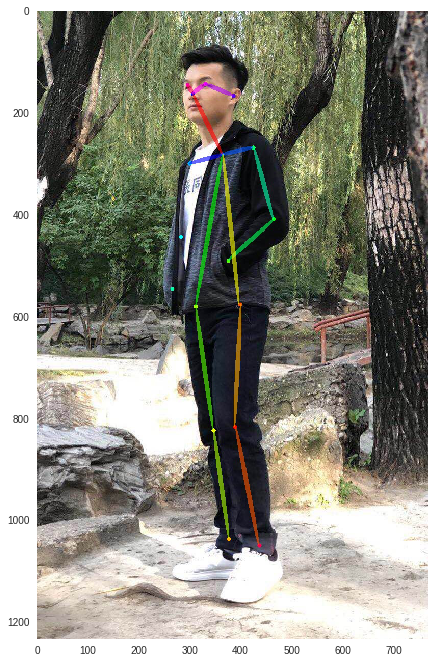

In [26]:
import matplotlib.pyplot as plt
from PIL import Image

def plot_effect(filepath):
    image = Image.open(filepath)
    fig, ax = plt.subplots(figsize=(7, 12))
    ax.imshow(image)
    plt.grid(False)
    plt.show()
plot_effect("Victor_test_0_out.jpg")

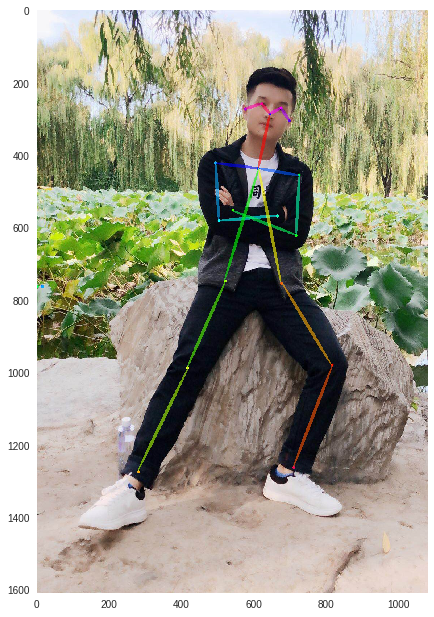

In [24]:
plot_effect("Victor_test_1_out.jpg")

# 人身视频转换

In [27]:
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [0]:
import io
import base64
from IPython.display import HTML

def show_video(video_path):
    video = io.open(video_path, 'r+b').read()
    encoded = base64.b64encode(video)
    display(HTML(data='''<video alt="test" controls>
                    <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                 </video>'''.format(encoded.decode('ascii'))))
    
show_video("test_video_1.mp4.mp4")

Output hidden; open in https://colab.research.google.com to view.

In [0]:
!mv test_video_1.mp4 videos/test_video_1.mp4

In [0]:
!python demo_video.py \
--video "test_video_1.mp4" \
--model "./keras/model.h5" \
--frame_ratio 1 \
--process_speed 4 

Using TensorFlow backend.
start processing...
Processing frame:  0
processing time is 30.17376
Processing frame:  1
processing time is 29.57091
Processing frame:  2
processing time is 29.95008
Processing frame:  3
processing time is 29.74483
Processing frame:  4
processing time is 29.80230
Processing frame:  5
processing time is 29.76325
Processing frame:  6
processing time is 29.94247
Processing frame:  7
processing time is 29.80737
Processing frame:  8
processing time is 29.74687
Processing frame:  9
processing time is 29.82084
Processing frame:  10
processing time is 29.77368
Processing frame:  11
processing time is 29.76685
Processing frame:  12
processing time is 29.74420
Processing frame:  13
processing time is 29.56050
Processing frame:  14
processing time is 29.50313
Processing frame:  15
processing time is 29.52153
Processing frame:  16
processing time is 29.63319
Processing frame:  17
processing time is 29.57177
Processing frame:  18
processing time is 29.72687
Processing fra

In [0]:
!ls videos/outputs/
# show_video("videos/outputs/sample2.mp4")

In [0]:
from google.colab import files
files.download("demo_video.py")

# 实时视频检测人体姿势识别

In [0]:
!python demo_camera.py \
--model "./keras/model.h5" \
--frame_ratio 1 \
--process_speed 4 

Using TensorFlow backend.
start processing...
VIDEOIO ERROR: V4L: can't open camera by index 0
Running at 0.0 fps.
